<a href="https://colab.research.google.com/github/gabriellecastilho/42_basecamp/blob/main/Data_Engineering_A2_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Engineering A2 Report**
Gabrielle Fidelis de Castilho

#Task 1.1

**a. Look at the contents of the folder “output” - what are the files placed in 
there? What do they mean? Use the cat tool to inspect the output files**

`The files are _SUCCESS and part-r-00000. The former means that the operations ran successfully and doesn’t appear to have any readable content. The latter contains all words in the input file with their respective counts.`



**b. Looking at the output files, How many times did the word ‘Discovery’ (case-sensitive) appear in the text you analyzed?**

`5 times`

**c. In this example we used Hadoop in “Local (Standalone) Mode”. What is the difference between this mode and the Pseudo-distributed mode?**

`Local Standalone Mode runs in a non-distributed mode as a single Java process. Pseudo-distributed mode  run on a single-node where each Hadoop daemon runs in a separate Java process. HDFS configuration define separate nodes for NameNode and DataNode, but in same machine.`$^{[1]}$


#Task 1.2

**a. What are the roles of the files core-site.xml and hdfs-site.xml?**

`The core-site.xml file informs Hadoop daemon where NameNode runs in the cluster. It contains the configuration settings for Hadoop Core such as I/O settings that are common to HDFS and MapReduce. The hdfs-site.xml file contains the configuration settings for HDFS daemons: the NameNode, the Secondary NameNode, and the DataNodes. We can configure hdfs-site.xml to specify default block replication and permission checking on HDFS. The actual number of replications can also be specified when the file is created. The default is used if replication is not specified in create time.`$^{[2]}$

**b. Describe briefly the roles of the different services listed when executing ‘jps’.**

`In Hadoop, the command 'jps' is used to check all the Hadoop daemons running in the machine, in our case NameNode, DataNode and Jps. Jps stands for Java Process Status tool, and provides information about Java processes running. An HDFS cluster consists of a single NameNode, a master server that manages the file system namespace and regulates access to files by clients, and a number of DataNodes, usually one per node in the cluster, which manage storage attached to the nodes that they run on. HDFS exposes a file system namespace and allows user data to be stored in files. Internally, a file is split into one or more blocks and these blocks are stored in a set of DataNodes. The NameNode executes file system namespace operations like opening, closing, and renaming files and directories. It also determines the mapping of blocks to DataNodes. The DataNodes are responsible for serving read and write requests from the file system’s clients. The DataNodes also perform block creation, deletion, and replication upon instruction from the NameNode.`$^{[3]}$

#Task 1.3

**a. Explain the roles of the different classes in the file WordCount.java.**

`The role of the TokenizerMapper class is to map the keys to the existing values by appending a single number or digit to each word. The output are key-value pairs that will serve as input for the IntSumReducer class. The role of the IntSumReducer classw is to sum up all the values to similar keys, and the output are the grouped key-value pairs.`

**b. What is HDFS, and how is it different from the local filesystem on your virtual machine?**

` HDFS is a unique file system used by Hadoop for storing and managing big data that facilitates the partitioning of the data, breaking it down into various blocks that can be distributed to multiple machines over different systems. HDFS is fault tolerant and the block size can be controlled by the user. On the other hand, the local filesystem doesn’t follow the distributed pattern, isn't fault tolerant, and is controlled by the Operating System.`$^{[4]}$

#Task 1.4

**Make a plot that shows the counts for each letter and include that in your report.**

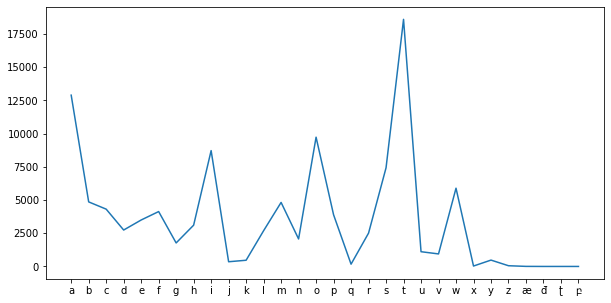

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/gabriellecastilho/datasets/master/part-r-00000.csv")
plt.figure(figsize=(10,5))
plt.plot(df['letter'], df['count'])
plt.show()

#Task 1.5

**1. Based on the twitter documentation, how would you classify the JSON-formatted tweets - structured, semi-structured or unstructured data?**

`The JSON formatted tweets would be considered semi-structured, as it's flexible regarding the fields it contains. The attribute 'in_reply_to_status_id', for example, can be ignored if not needed. It doesn't have to follow a schema, but offers some kind of structure nonetheless.`

**2. Elaborate on pros and cons for SQL and NoSQL solutions, respectively. Give some examples of particular data sets/scenarios that might be suitable for these types of databases. (expected answer length: 0.5 A4 pages)**

`Both SQL and NoSQL databases serve specific needs and use cases extremely well. Depending on the organization’s data environment and goals, specific pros and cons of each could be amplified, with the best solution being to use both, letting each type of database play to its strengths.`

`SQL Pros`

`1. All data added to the database must comply with the well-known schema of linked tables made up of rows and columns. This is helpful when data consistency, integrity, security, and compliance are at a premium. 2. The SQL programming language is extremely mature and has a strong community, with countless experts willing to share tips and well-established best practices. 3. Its extremely structured nature enables SQL databases to be ACID (Atomicity, Consistency, Isolation, Durability) compliant, keeping tables in-sync and guarantees the validity of transactions. Ideal for applications that have no room for error and need the highest level of data integrity.`

`SQL Cons`

`1. The norm for SQL databases is to scale-up vertically, by increasing capabilities, such as RAM, CPU, and SSD, on the existing server or by migrating to a larger, more expensive one. Each upgrade is sure to be expensive and resource intensive, including ongoing, everyday maintenance and operating costs. 2. As SQL databases get large, the lookups and joins required between numerous tables can slow things down, as relational databases attempted to negate data duplication. In some cases, an organization may attempt to horizontally scale a SQL database through partitioning. This added complexity magnifies the time and resources expended. 3. A SQL database’s schema must be defined before use. Once in place, they are inflexible, and modifications are typically difficult and resource-intensive.`

`NoSQL Pros`

`1. With NoSQL, data is distributed across multiple servers and regions, so NoSQL databases are more stable and resilient, with continuous availability and zero downtime. 2. Since NoSQL databases are denormalized, all the information needed for a particular query will often be stored together, making lookups easier, especially when working with large data volumes. 3. NoSQL database schemas don’t have to be predefined. Instead, they are dynamic with the ability to handle all types of data, without spending time defining their structure.  The flexibility and adaptive nature of NoSQL databases make them a great fit for organizations that expect to continuously add new features and functionality. 4. NoSQL databases scale-out horizontally, making it cost-effective to expand capacity. They’re a good fit for cloud computing and handling extremely large and quickly growing datasets.`

`NoSQL Cons`

`1. There isn’t a standard language to conduct NoSQL queries. The syntax used to query data varies for the different types of NoSQL databases. 2. It is less mature than the SQL community. So, it could be harder to solve undocumented issues. 3. ith the variety of data structures found in NoSQL databases, querying isn’t as efficient. Even simple NoSQL queries will likely require programming experience. This means more technical and costly staff. 4. The distributed nature of NoSQL databases can make it more difficult to ensure the data is always consistent. The database could return different values depending on which server happens to be queried. This is one of the reasons NoSQL doesn’t achieve ACID-level compliance.  In the real world, this is often a small delay of only a few milliseconds.`$^{[5]}$


#References

[1] http://umashanthan.blogspot.com/2016/03/what-difference-between-local.html

[2] https://www.edureka.co/blog/explaining-hadoop-configuration/

[3] https://hadoop.apache.org/docs/r1.2.1/hdfs_design.html#NameNode+and+DataNodes 

[4] https://www.sciencedirect.com/science/article/pii/B9780124114746000189

[5] https://www.datastax.com/blog/sql-vs-nosql-pros-cons